In [1]:
%load_ext autoreload
%autoreload 2
from sage.all import *
from utility import *

In [16]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

X = x^2*y + x*y^2  + x + 2*y + z -1

# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C is x^2*y + x*y^2 + t + x + 2*y - 1 == 0
The model fibre over 0 is x^2*y + x*y^2 + x + 2*y - 1 == 0
Critical values: 4 
Critical points: 4


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of pi'}>)

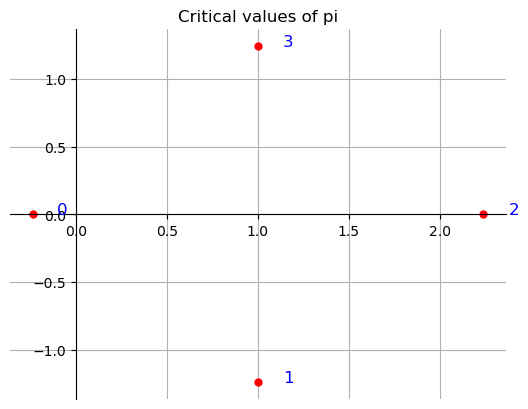

In [17]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = alpha*x + beta*y + gamma*z


pi = pi.subs({
    alpha: 0,
    beta: 0,
    gamma: 1
})

pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = 0
solvefor=z

t = var('t', domain=CC)

t_fibre = pi.get_fibre(t, solvefor)
print(f'The fibre over t in C is {t_fibre==0}')
print(f'The model fibre over {origin_fibre} is {t_fibre.subs({t:origin_fibre})==0}')

crit_values_pi = sort_by_angle(pi.get_critical_values(), origin_fibre)
crit_points_pi = pi.get_critical_points()

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)

## The fibration $\rho$

[x^2*y + x*y^2 + x + 2*y - 1 == 0, x^2 - y^2 + 1 == 0]
[[x == (-0.137568088862364 + 1.43914614470489*I), y == (-0.189784735608065 + 1.04318497526351*I)], [x == (-0.137568088862364 - 1.43914614470489*I), y == (-0.189784735608065 - 1.04318497526351*I)], [x == (-0.862431911137636 + 0.831608173722946*I), y == (1.18978473560807 - 0.602802679440173*I)], [x == (-0.862431911137636 - 0.831608173722946*I), y == (1.18978473560807 + 0.602802679440173*I)]]
The expression of rho over t in C is x + y
Critical values: 4
Critical points: 4


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Critical values of rho'}>)

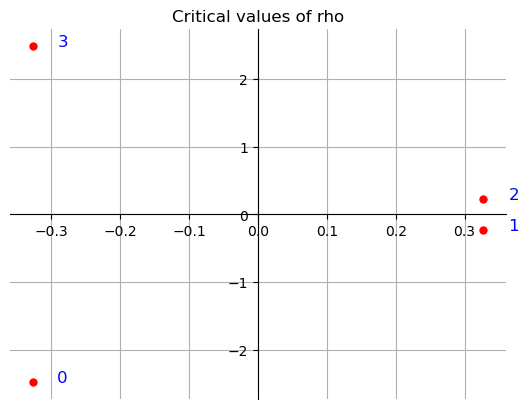

In [34]:
rho = x+y

rho_t = rho.subs(solvefor == t_fibre)
rho_0 = rho_t.subs(t==origin_fibre)


rho = LefschetzFibration([x,y], t_fibre.subs(t==origin_fibre), rho_0)

# crit_points_rho = rho.get_critical_points()
# crit_values_rho = sort_by_angle(rho.get_critical_values())
# Somehow crit values is bugging out

a = var('a', domain=CC)
constraints = [rho.domain==0]
gradient_constraints = [rho.domain.diff(variable) == a*rho.fibration.diff(variable) for variable in rho.variables]
a_solved = solve(gradient_constraints[0], a)[0]
b = gradient_constraints[0]
gradient_constraints = [constraint.lhs() - constraint.rhs().subs(a_solved) ==0 for constraint in gradient_constraints[1:]]
constraints.extend(gradient_constraints)
print(constraints)

crit_points_rho = solve(constraints, rho.variables)
crit_points_rho = [[expression.lhs() == expression.rhs().n() for expression in solution] for solution in crit_points_rho]
crit_values_rho = sort_by_angle([rho(cpoint) for cpoint in crit_points_rho])

print(crit_points_rho)

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre, title="Critical values of rho")


### Vanishing Cycles of Rho

#### Origin Fibre

In [33]:
origin_fibre_rho = 0
solvefor_rho = y

t_fibre_rho = rho.get_fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0)

sols = NumericalRoots(fibre_rho_0)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")

print(crit_values_rho)

-x^(5/2) + x^2 + x - 2*sqrt(x) - 1


ValueError: cannot return dense coefficient list with noninteger exponents

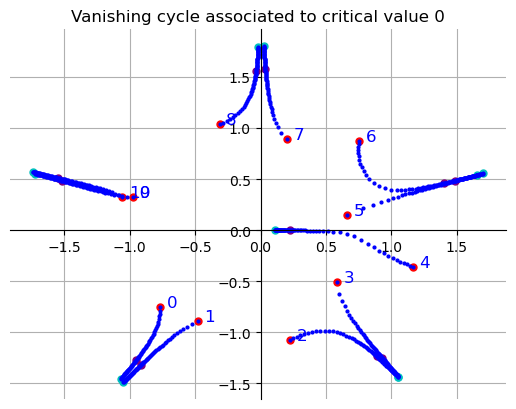

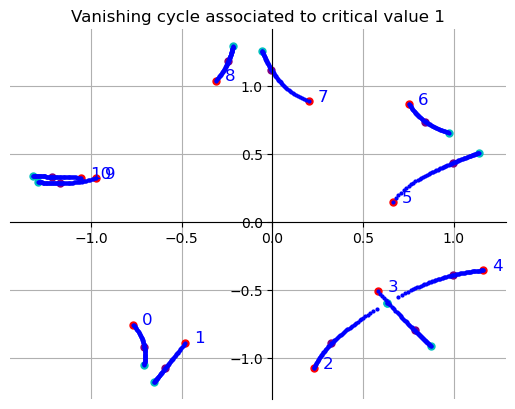

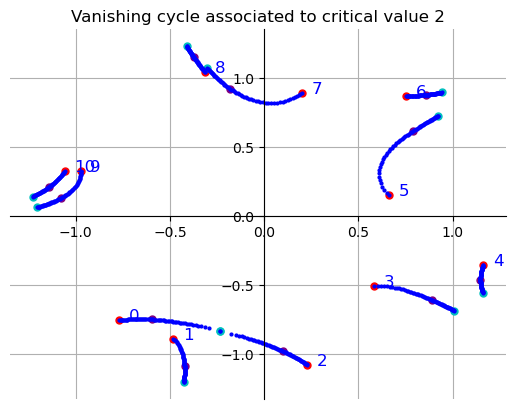

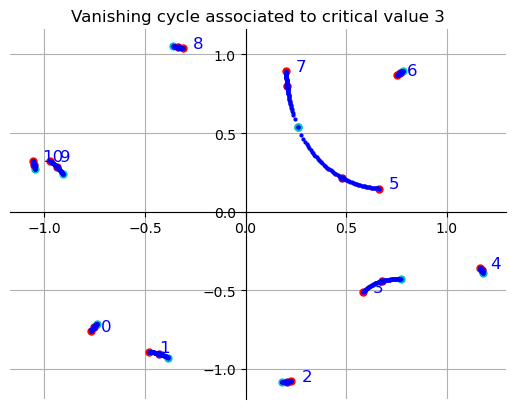

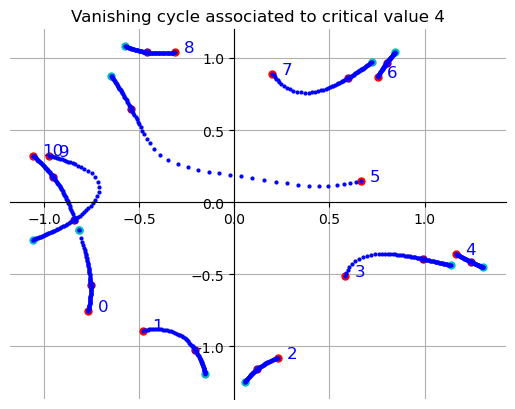

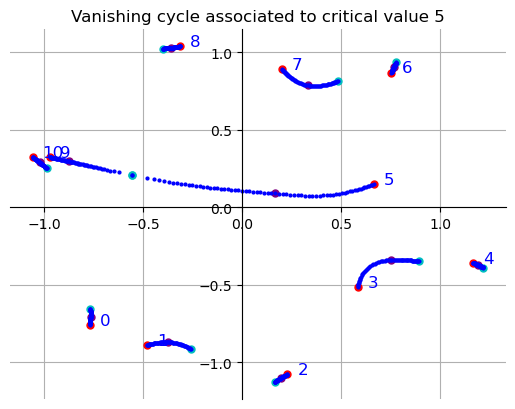

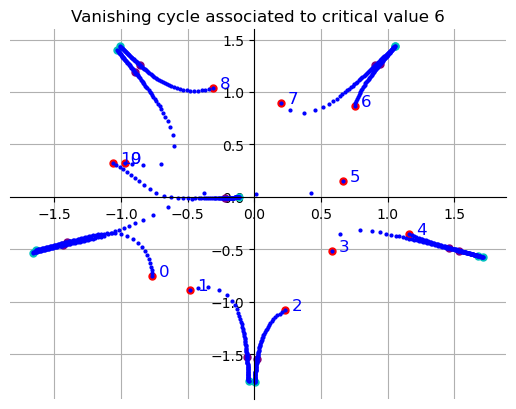

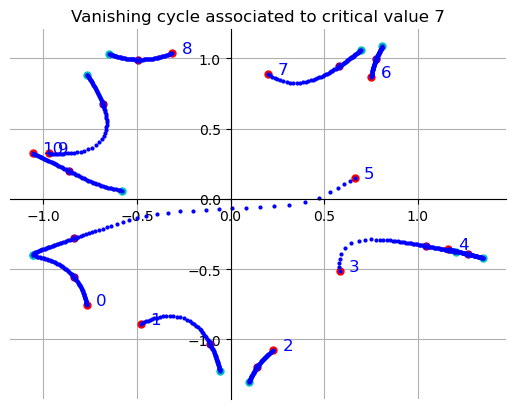

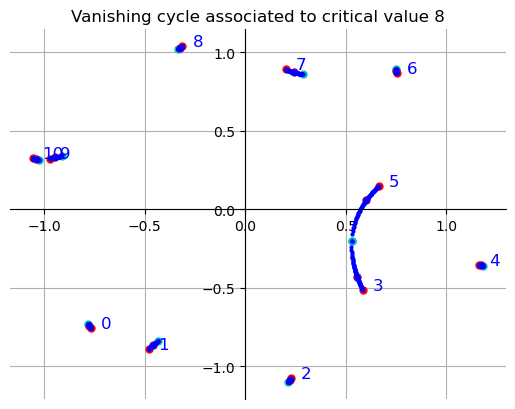

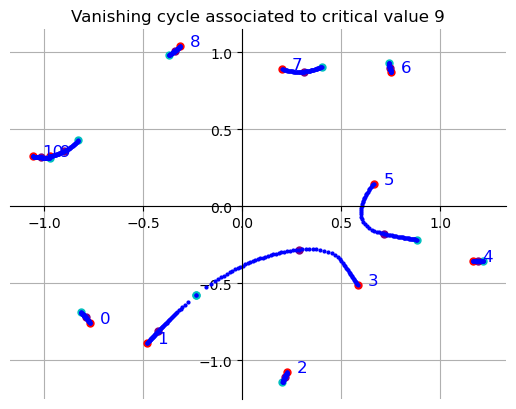

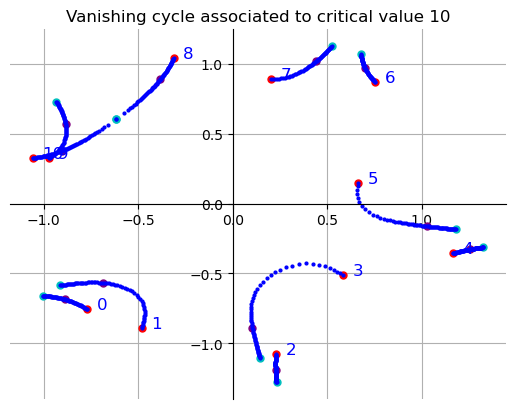

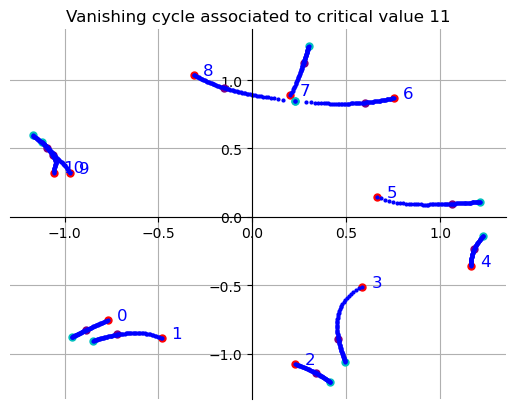

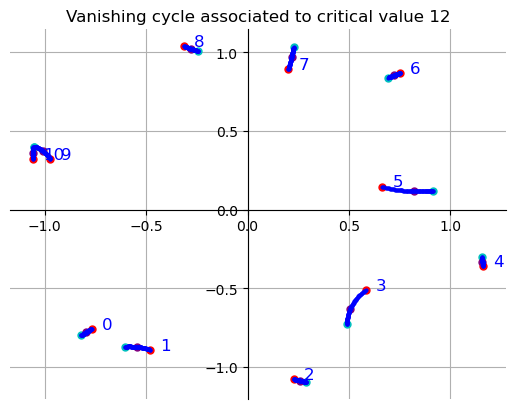

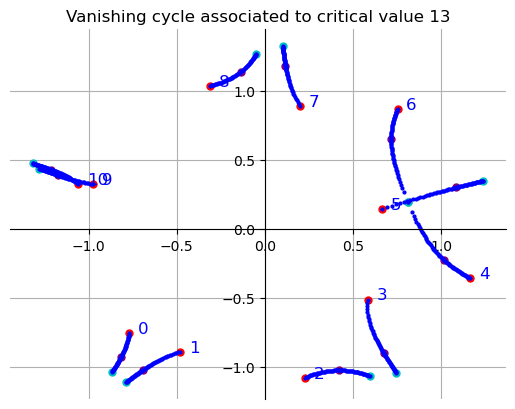

In [30]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}')    

## Matching Paths - Images of Vanishing Cycles

In [10]:
for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre_rho, crit, solvefor=solvefor, steps=140)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object